In [1]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
import joblib

2.11.0


In [2]:
yeast_feature_data = pd.read_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Yeast_data\\MLP\\Yeast_features_testing.csv", header = 0)
yeast_solubility_data = pd.read_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Yeast_data\\MLP\\Yeast_solubility_testing.csv", header = 0)




yeast_index = yeast_feature_data['Number']
yeast_feature_data = yeast_feature_data.drop(['Number', 'FASTA', 'gene','calculated pI'], axis=1)
yeast_solubility_data = yeast_solubility_data.drop(['Number'],axis=1)



mean=np.load("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Ecoli_data\\Scaling\\MLP\\mean.npy")
std=np.load("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\Ecoli_data\\Scaling\\MLP\\std.npy")



target_test_yeast = yeast_solubility_data

#yeast_input = inputs_test_yeast.to_numpy()
#yeast_target = target_test_yeast.to_numpy()





yeast_input = (yeast_feature_data.values - mean)/std
yeast_target = yeast_solubility_data
yeast_target = yeast_target.to_numpy()

#inputs_test = (feature_data_test.values - mean)/std
#target_test = solubility_data_test

#target_train = target_train.to_numpy()
#target_test = target_test.to_numpy()

4/4 [==============================] - 0s 1ms/step
0.30285517592994415


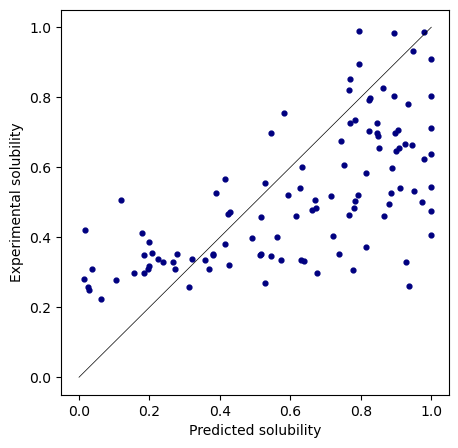

In [10]:
model = load_model("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Models\\MPL.h5")
test_predictions = model.predict(yeast_input).flatten()
fig, ax = plt.subplots(figsize=(5, 5))
plt.scatter(yeast_target, test_predictions,s=12, color='navy')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
MLP_r2 = metrics.r2_score(yeast_target, test_predictions)
plt.plot([0, 1], [0, 1],color='black',linewidth=0.5)
plt.xlabel('Predicted solubility')
plt.ylabel('Experimental solubility')
print(MLP_r2)

In [4]:
df = pd.DataFrame(test_predictions)
merge3 = [yeast_index, df]
yeast_result = pd.concat(merge3, axis=1)


yeast_result.to_csv("C:\\Users\\johnkwon\\Desktop\\[Ultima]_Solubility\\Data\\yeast_data\\MLP_result_new.csv")